<img src="../logo_UTN.svg" align="right" width="150" /> 

# Teoría De Circuitos 2

# Trabajo Semanal Nº2
#### Federico Borello

### Consigna

Dado el circuito:

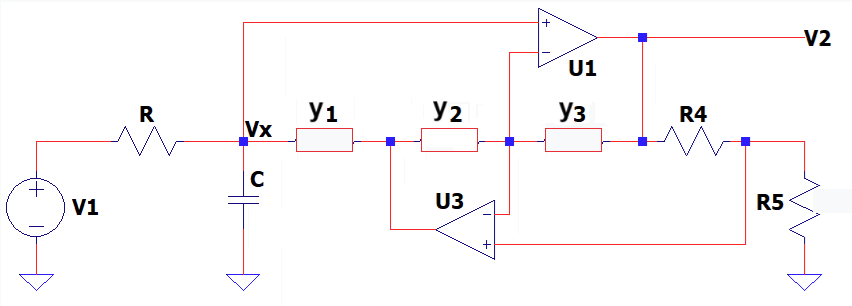

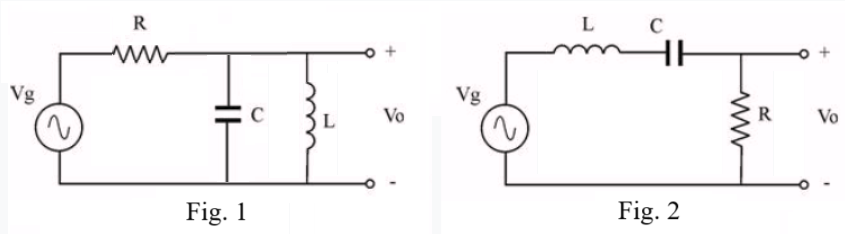


1. Analizar la impedancia de entrada desde el nodo Vx. Hallar los valores de R4, R5, Y1, Y2 e Y3 de tal manera que se comporte como un inductor de valor unitario. 
2. Obtener la función transferencia $\cfrac{V_2}{V_1}$. Desnormalizar convenientemente en frecuencia e impedancia para garantizar una f0 = 10kHz  y Q = 20 utilizando capacitores entre 1 nF y 100 nF: ¡los resistores no tienen restricciones!
3. Simular la función transferencia desnormalizada en Python. Se sugiere programar la función transferencia normalizada y definir las normas de frecuencia e impedancia para desnormalizar. Verificar los requerimientos pedidos en 2.

Bonus:

- +1 💎 Obtener los valores de R4 y R5 para obtener un filtro pasabanda con una ganancia +20 dB en el centro de la banda de paso, es decir, en $f0$.
- +1 💎 Evaluar la posibilidad de reemplazar el inductor L de la Fig. 2 por un GIC. Tenga presente que NO debe realizar ningún tipo de cuenta pero Si debe indicar si se presenta -o no- algún tipo de inconveniente o limitación.
- +2 💎  Graficar la respuesta de módulo en LTspice con el eje lineal en frecuencia. Halle numéricamente $BW = f2 - f1$  y verifique que $f0$ sea la media geométrica entre $f2$ y $f1$.


In [1]:
from IPython.display import HTML

file = "./TS2_handwritten.pdf"
html = f"""
<div style="text-align:center;">
    <iframe src="{file}" width="900" height="600"></iframe>
</div>
"""
HTML(html)

In [2]:
# SetUp - Import /utils module
import sys
import os

sys.path.append(os.path.abspath(".."))
import utils.plot as uplt

# Import common packages
from IPython.display import display, Markdown
import sympy as sp
import numpy as np

# Analisis del circuito Girador (GIC)

In [3]:
# Defino las Variables del circuito
Vx, Vu2, Vn, Vu1, Vw, Ix = sp.symbols("Vx Vu2 Vn Vu1 Vw, Ix", real=True)
Y1, Y2, Y3, Y4, Y5 = sp.symbols("Y1 Y2 Y3 Y4 Y5", real=True)

# Defino las incognitas
X = sp.Matrix([Vx, Vu2, Vn, Vu1, Vw])

# Matriz de coeficientes A
A = sp.Matrix(
    [
        [Y1, -Y1, 0, 0, 0],  # eq1 = sp.Eq(Vx * Y1 - Vu2 * Y1, Ix)
        [
            0,
            -Y2,
            Y2 + Y3,
            -Y3,
            0,
        ],  # eq2 = sp.Eq(Vn * (Y2 + Y3) - Vu2 * Y2 - Vu1 * Y3, 0)
        [0, 0, 0, -Y4, Y4 + Y5],  # eq3 = sp.Eq(Vw * (Y4 + Y5) - Vu1 * Y4, 0)
        [0, 0, 1, 0, -1],  # eq4 = sp.Eq(Vn, Vw)
        [1, 0, 0, 0, -1],  # eq5 = sp.Eq(Vx, Vw)
    ]
)

# Vector B
B = sp.Matrix([Ix, 0, 0, 0, 0])

# A.X=B
sol = A.LUsolve(B)
# Obtengo Vx/Ix
Zy = sp.simplify(sol[0] / Ix)

Z1, Z2, Z3, Z4, Z5 = sp.symbols("Z1 Z2 Z3 Z4 Z5", real=True)
subs = {Y1: 1 / Z1, Y2: 1 / Z2, Y3: 1 / Z3, Y4: 1 / Z4, Y5: 1 / Z5}
Zz = Zy.subs(subs)
# Pretty Print
Zy_latex = sp.latex(Zy)
Zz_latex = sp.latex(Zz)

markdown_text = rf"""
### Fórmula del GIC

- **Impedancias**: $$Z_{{\text{{in}}}} = {Zz_latex}$$
- **Admitancias**: $$Z_{{\text{{in}}}} = {Zy_latex}$$
"""

display(Markdown(markdown_text))


### Fórmula del GIC

- **Impedancias**: $$Z_{\text{in}} = \frac{Z_{1} Z_{3} Z_{5}}{Z_{2} Z_{4}}$$
- **Admitancias**: $$Z_{\text{in}} = \frac{Y_{2} Y_{4}}{Y_{1} Y_{3} Y_{5}}$$


# Caso de Estudio

Nuestro circuito en análisis es el PasaBanda reemplazando el inductor por el GIC y tomando la salida del operacional de $V{\text{u2}}$ en vez de $V_x$.

Para tener un inductor como $Z_{\text{in}}$ del GIC, y teniendo en cuenta que $Z_4$ y $Z_5$ son resistores, $Z_2$ debe ser un capacitor y el resto de componentes pueden ser resistores.

Se puede pensar como un pasabandas común $\Big(H(s) = \cfrac{V_x}{V_1}\Big)$, y a esa transferencia se la debe multiplicar por $T_2(s) = \cfrac{V_2}{V_x}$



In [4]:
T2 = sp.simplify(sol[3] / Vx)
T2 = T2.subs(Ix / Vx, 1 / Zy)
T2 = T2.subs(subs)
T2 = sp.simplify(T2)
T2

(Z4 + Z5)/Z5

La transferencia total queda:

$$
T(s) = \cfrac{\frac{s}{RC}}{s^2+\frac{s}{RC}+\frac{1}{LC}} \times \cfrac{Z_4 + Z_5}{Z_5}
$$

Con L siendo:

$$
L = \cfrac{C_2 \, R_1 \, R_3 \, R_5}{R_4}
$$

Se propone:
- $R_1 = R_3 = R_5$
- $C = C_2$

Los parámetros de diseño son:
 
$$K = 1 + \frac{R_4}{R_5} \, \rightarrow \, R_4 = (K-1) \, R_5$$
 
$$Q = \frac{R\, \sqrt{K-1}}{R_1} \, \rightarrow \, R = Q \, \frac{R_1}{\sqrt{K-1}}$$

$$\omega_0 = \frac{\sqrt{K-1}}{R_1 \, C} \, \rightarrow \, R_1 = \frac{\sqrt{K-1}}{\omega_0 \, C}$$

Y si la restricción es de capacitores entre $1nF$ y $100nF$, se propone usar capacitores de $100nF$.

El ejercicio pide $Q=20$ y $f_0 = 10kHz$, se propone $K=2$ por simplicidad.

In [5]:
R, C, L = sp.symbols("R C L", real=True, positive=True)
Z4, Z5 = sp.symbols("Z4 Z5", real=True, positive=True)
s = sp.symbols("s")

# Defino la transferencia T(s)
num = s / (R * C)
den = s**2 + s / (R * C) + 1 / (L * C)
T = (num / den) * (Z4 + Z5) / Z5

# Definir L en función de los otros componentes (GIC)
C2, R1, R3, R4, R5 = sp.symbols("C2 R1 R3 R4 R5", real=True, positive=True)
L_expr = (C2 * R1 * R3 * R5) / R4

# Sustituir L en T
T = T.subs(L, L_expr)
T = T.subs({Z4: R4, Z5: R5, C2: C})
T

s*(R4 + R5)/(C*R*R5*(s**2 + s/(C*R) + R4/(C**2*R1*R3*R5)))

R1 = 159.15494309189535
R = 3183.098861837907


$$H(s) = 6.28E^{3} \frac{(+ 6.28E^{3}s)}{(s^2 + 3.14E^{3}s + 3.95E^{9})}$$

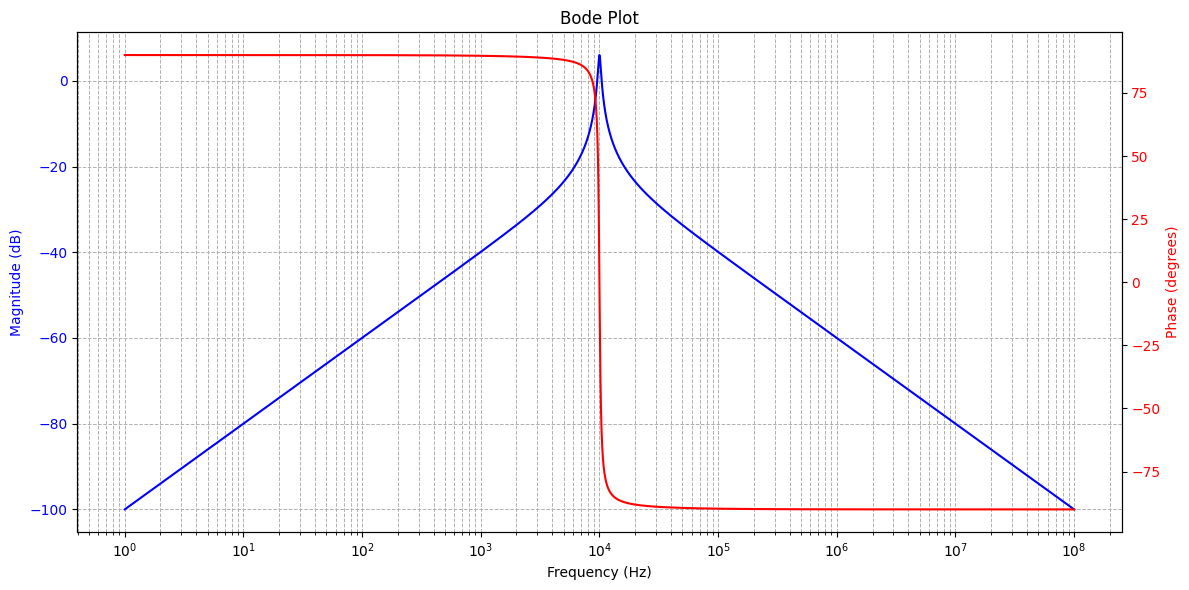

Frecuencia donde la ganancia es 6.020599913279624[dB] || 2 veces: [ 9994.2448342 10005.7584799]


In [6]:
f0 = 10e3
w0 = 2 * np.pi * f0
Q = 20
C0 = 100e-9
K = 2

R1v = ((K - 1) ** (1 / 2)) / (w0 * C0)

Rv = Q * R1v / ((K - 1) ** (1 / 2))

print(f"R1 = {R1v}")
print(f"R = {Rv}")

values = {R: Rv, C: C0, R1: R1v, R3: R1v, R4: (K - 1) * R1v, R5: R1v}

(magnitude_db, frequencies, _) = uplt.plot_tf(T, values, f0)

indices = np.where(np.isclose(magnitude_db, 20 * np.log10(K), atol=0.005))[0]
match_frequency = frequencies[indices]
print(
    f"Frecuencia donde la ganancia es {20*np.log10(K)}[dB] || {K} veces: {match_frequency}"
)

Si se quiere calcular $R_1$ y $R$ para $K= 10 = 20dB$, manteniendo los demas parámetros fijos:

R1 = 477.46482927568604
R = 3183.098861837907


$$H(s) = 3.14E^{4} \frac{(+ 3.14E^{4}s)}{(s^2 + 3.14E^{3}s + 3.95E^{9})}$$

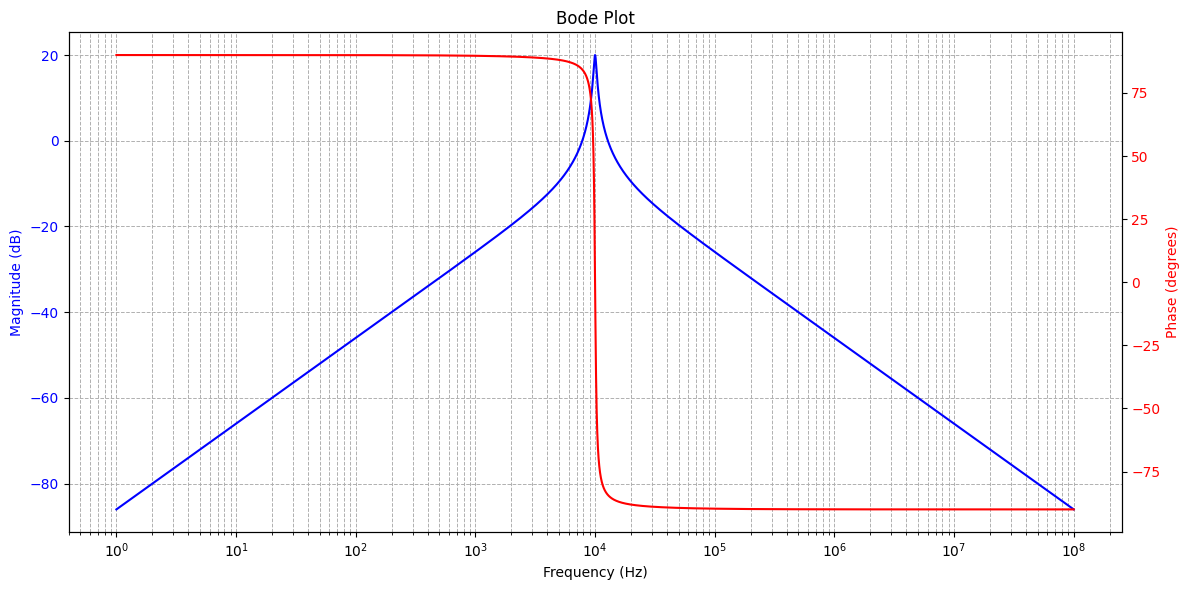

Frecuencia donde la ganancia es 20.0[dB] || 10 veces: [ 9994.2448342 10005.7584799]


In [7]:
K = 10

R1v = ((K - 1) ** (1 / 2)) / (w0 * C0)

Rv = Q * R1v / ((K - 1) ** (1 / 2))

print(f"R1 = {R1v}")
print(f"R = {Rv}")

values = {R: Rv, C: C0, R1: R1v, R3: R1v, R4: (K - 1) * R1v, R5: R1v}

(magnitude_db, frequencies, _) = uplt.plot_tf(T, values, f0)

indices = np.where(np.isclose(magnitude_db, 20 * np.log10(K), atol=0.005))[0]
match_frequency = frequencies[indices]
print(
    f"Frecuencia donde la ganancia es {20*np.log10(K)}[dB] || {K} veces: {match_frequency}"
)

Podemos obtener el ancho de banda de manera gráfica, el cual está relacionado con el $Q$:

$$
Q = \cfrac{f_c}{BW}
$$

Siendo $f_c$ la frecuencia central.

En este caso:

$$
20 = \cfrac{10kHz}{BW}
$$

y obtenemos

$$BW = 500Hz$$

Si empleamos el criterio de los $-3dB$ podemos calcular el ancho de banda de manera práctica.

Y la media geométrica se calcula como:

$$
f_c = \sqrt{f_2 \, f_1}
$$

In [8]:
max_gain_db = np.max(magnitude_db)
indices = np.where(np.isclose(magnitude_db, 20 * np.log10(K) - 3, atol=0.1))[0]
f1 = frequencies[indices][0]
f2 = frequencies[indices][1]

geometric_mean = (f2 * f1) ** (1 / 2)

print(f"f2-f1 = {f2-f1}")
print(f"fc = {geometric_mean}")

f2-f1 = 495.1373024411532
fc = 10000.0


Por último, cabe resaltar que se pudo utilizar el GIC para generar un inductor virtual y conectarlo al circuito ya que el la $Z_{\text{in}}$ del GIC es con respecto a masa. Si el inductor hubiera estado en serie en vez de en derivación a tierra, no sería posible implementar un GIC.

### Simualación con LT Spice

Circuito:
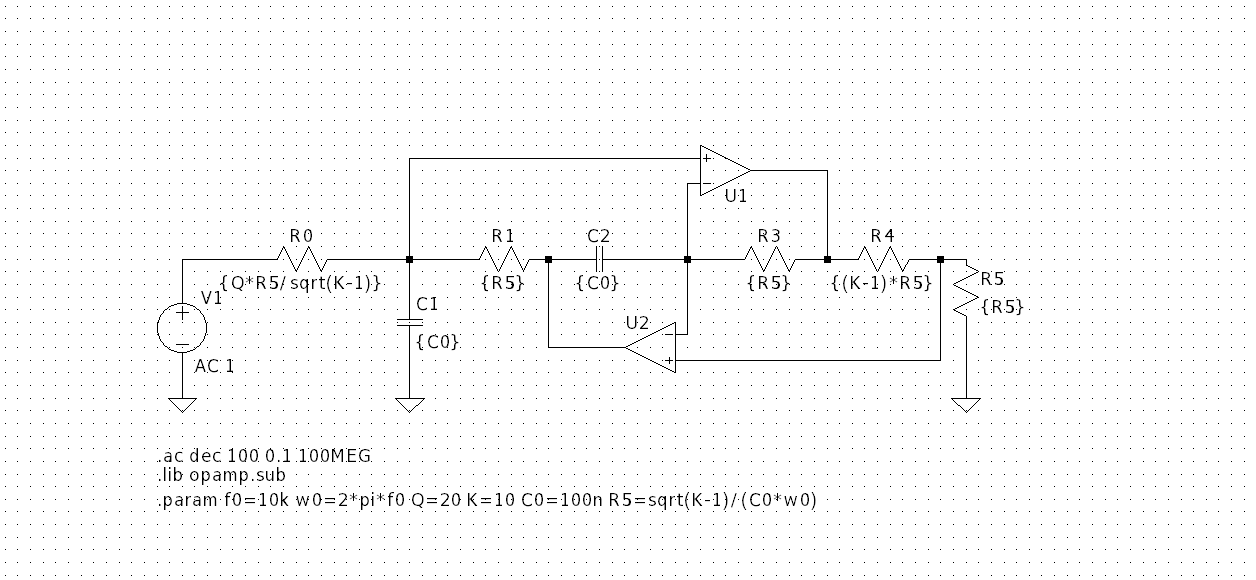

Magnitud y Fase:
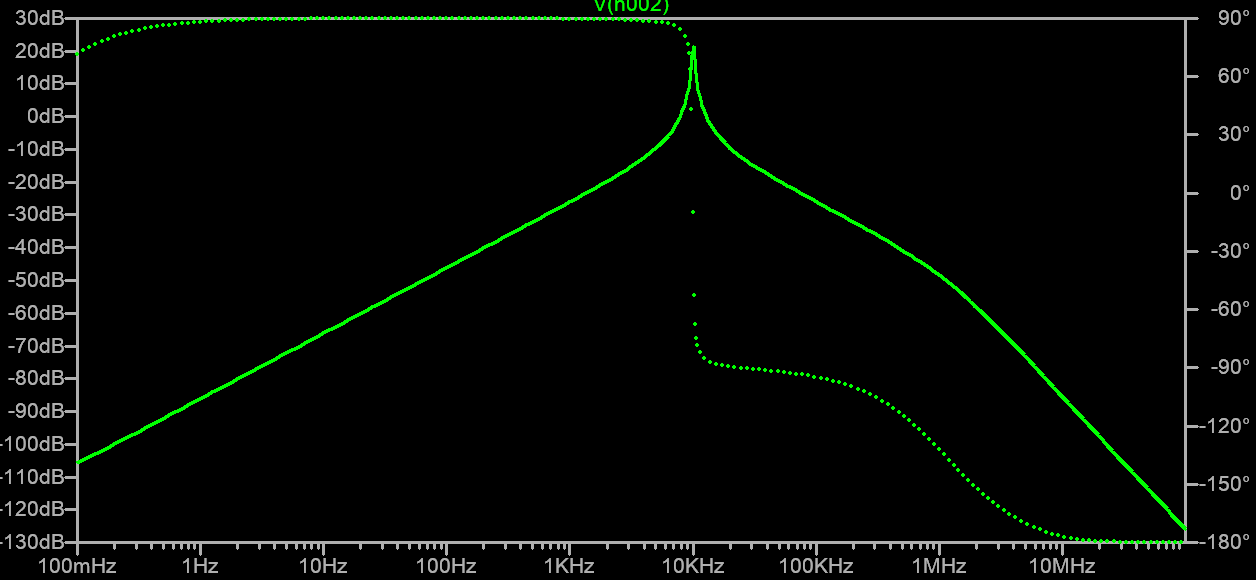

Ancho de banda:
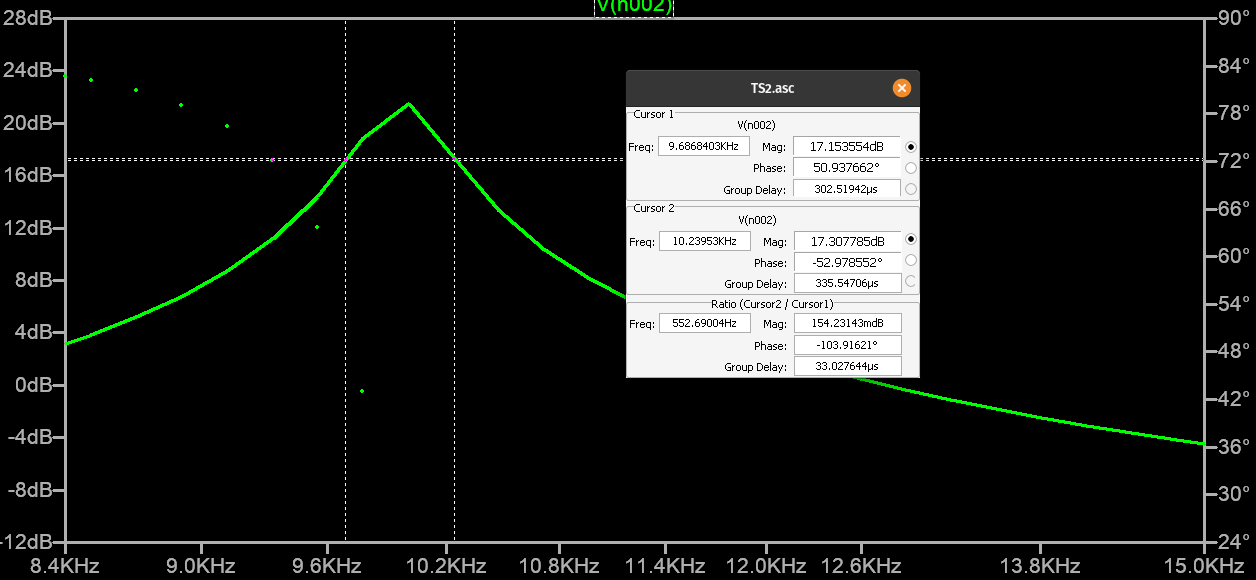

<a href="./TS2.asc" download="TS2.asc">Descargar TS2.asc</a>